## Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
norm_reviews = reviews[cols]
print(norm_reviews[:5])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   
1               Cinderella (2015)           4.0                 3.75   
2                  Ant-Man (2015)           4.5                 4.05   
3          Do You Believe? (2015)           4.2                 2.35   
4   Hot Tub Time Machine 2 (2015)           1.4                 1.70   

   IMDB_norm  Fandango_Ratingvalue  
0       3.90                   4.5  
1       3.55                   4.5  
2       3.90                   4.5  
3       2.70                   4.5  
4       2.55                   3.0  


## Frequency Distribution

In [7]:
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts().sort_index()

In [8]:
imdb_distribution = norm_reviews['IMDB_norm'].value_counts().sort_index()

In [9]:
print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


## Histogram In Matplotlib

By default, matplotlib will:

* calculate the minimum and maximum value from the sequence of values we passed in
* create 10 bins of equal length that span the range from the minimum to the maximum value
* group unique values into the bins
* sum up the associated unique values
* generate a bar for the frequency sum for each bin

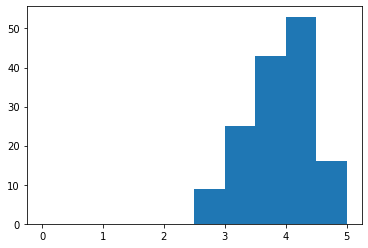

In [16]:
fig, ax = plt.subplots()

ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

## Comparing histograms

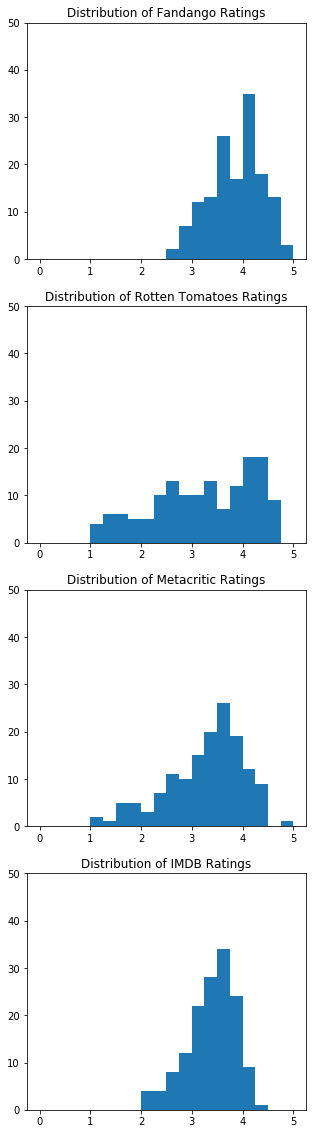

In [22]:
fig = plt.figure(figsize=(5,20))

ax1 = fig.add_subplot(4,1,1)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], range=(0,5), bins=20)
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2 = fig.add_subplot(4,1,2)
ax2.hist(norm_reviews['RT_user_norm'], range=(0,5), bins=20)
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3 = fig.add_subplot(4,1,3)
ax3.hist(norm_reviews['Metacritic_user_nom'], range=(0,5), bins=20)
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4 = fig.add_subplot(4,1,4)
ax4.hist(norm_reviews['IMDB_norm'], range=(0,5), bins=20)
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)

plt.show()

## Quartiles

From the histograms, we can make the following observations:

* Around 50% of user ratings from Fandango fall in the 2 to 4 score range
* Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
* Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
* Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent quartiles. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.

## Box Plot

![Jupyter](./boxplot_intro.png)

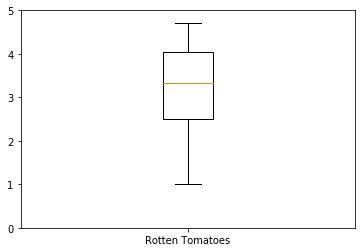

In [25]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0, 5)
ax.set_xticklabels(['Rotten Tomatoes'])

plt.show()

## Multiple Box Plots

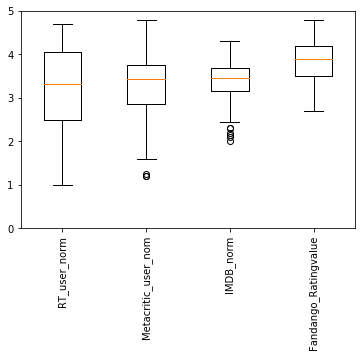

In [28]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0, 5)
plt.show()

From the boxplot, we can reach the following conclusions:

* user ratings from Rotten Tomatoes and Metacritic span a larger range of values
* user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values